In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

years = [2022,2023,2024]
start_date = "25.10.2022"
end_date = "31.03.2024"
days_in_year = pd.Series(pd.date_range("2000", freq="D", periods=366)).dt.strftime('%d.%m').values

Elektrika 

In [2]:
#import csv
csvs = []
for i,y in enumerate(years):
    csvs.append(pd.read_csv('podatki/elektro-'+str(y)+'.csv',delimiter=";",decimal=",",parse_dates=["Datum"],dayfirst=True))
    csvs[i].index = pd.DatetimeIndex(csvs[i]['Datum'])
    start_date_calc = y
    end_date_calc = y+1
    if (i == 0): 
        start_date_calc = start_date    
    if (i == len(years)-1): 
        end_date_calc = end_date 
    idx = pd.date_range(str(start_date_calc),str(end_date_calc), freq="D",inclusive="left")
    csvs[i] = csvs[i].reindex(idx)
    csvs[i]['Datum'] = csvs[i].index
    csvs[i] = csvs[i].reset_index(drop=True)
    csvs[i]['Datum'] = pd.to_datetime(csvs[i]['Datum'])
    csvs[i]['Merilno mesto'] = csvs[i]['Merilno mesto'].ffill()
    csvs[i]['GSRN MM'] = csvs[i]['GSRN MM'].ffill()

csvs[0].dtypes

Merilno mesto                          object
GSRN MM                               float64
Datum                          datetime64[ns]
PREJETA DELOVNA ENERGIJA ET           float64
PREJETA VT                            float64
PREJETA MT                            float64
ODDANA DELOVNA ENERGIJA ET            float64
ODDANA VT                             float64
ODDANA MT                             float64
dtype: object

In [3]:
#interpolated
csvs_filled = []
for csv in csvs:
    csvs_filled.append(csv.interpolate())

C:\Users\Nejc\AppData\Local\Temp\ipykernel_14720\978040664.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  csvs_filled.append(csv.interpolate())
C:\Users\Nejc\AppData\Local\Temp\ipykernel_14720\978040664.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  csvs_filled.append(csv.interpolate())
C:\Users\Nejc\AppData\Local\Temp\ipykernel_14720\978040664.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  csvs_filled.append(csv.interpolate())


Pridelava elektrike dnevno

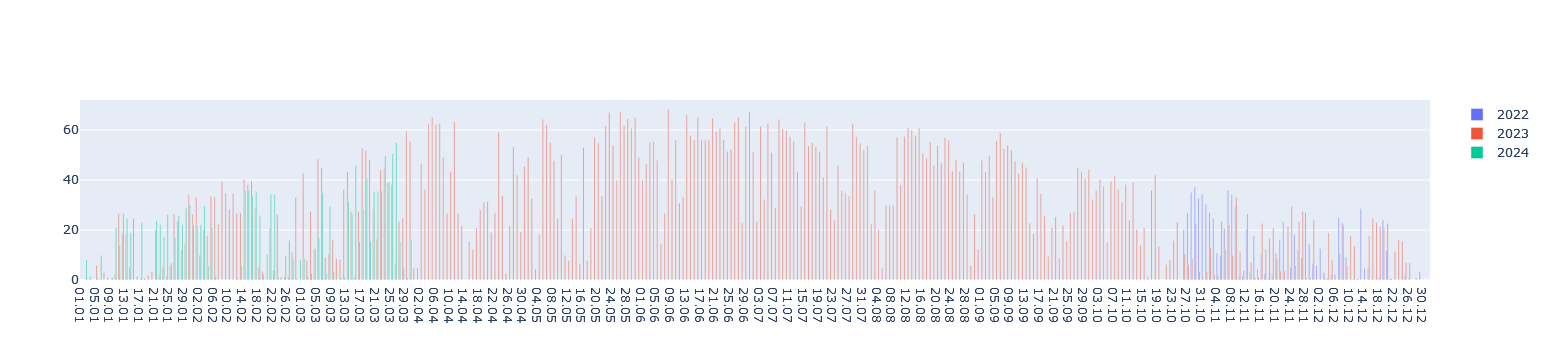

In [4]:
fig = go.Figure()
for i,csv in enumerate(csvs_filled):
    oddana_per_day = csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0]);
    fig.add_traces(go.Bar(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = oddana_per_day))

fig.update_layout(barmode='group')
fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified')
fig.show()

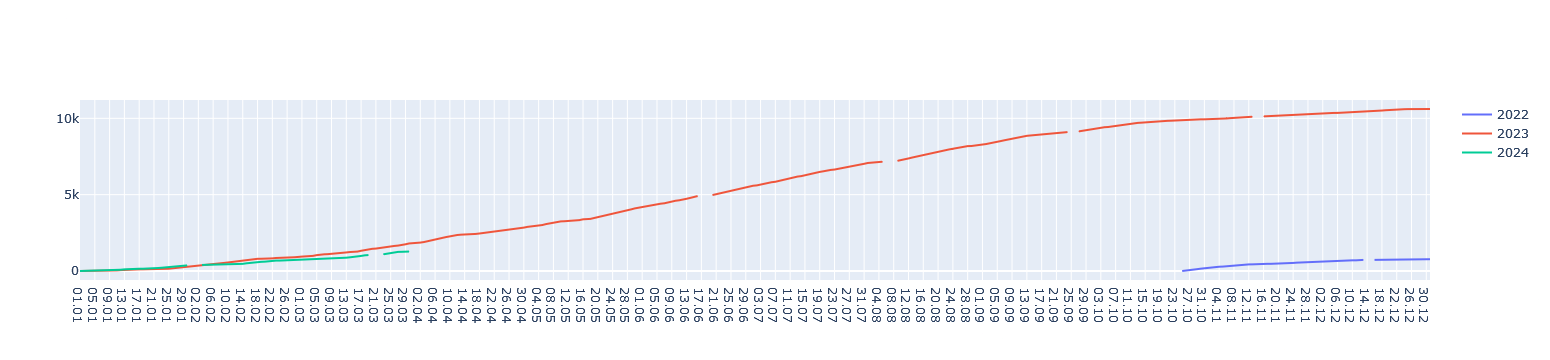

In [5]:
fig = go.Figure()
for i,csv in enumerate(csvs):
    skupna_oddana_letno = (csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0])).cumsum();
    fig.add_traces(go.Scatter(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = skupna_oddana_letno))

fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified')
fig.show()

Poraba elektrike dnevno

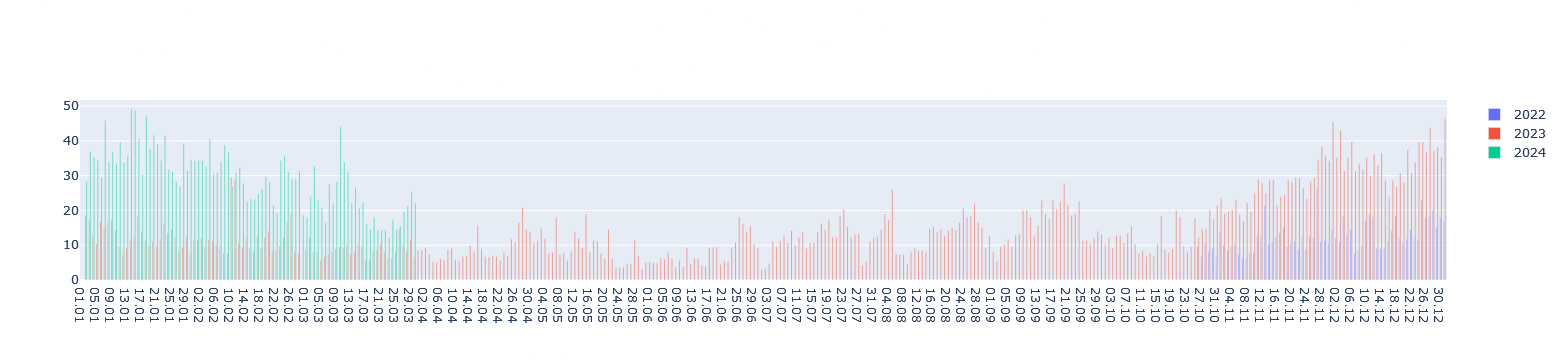

In [6]:
fig = go.Figure()
for i,csv in enumerate(csvs_filled):
    poraba_per_day = csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0]);
    fig.add_traces(go.Bar(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = poraba_per_day))

fig.update_layout(barmode='group')
fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified')
fig.show()

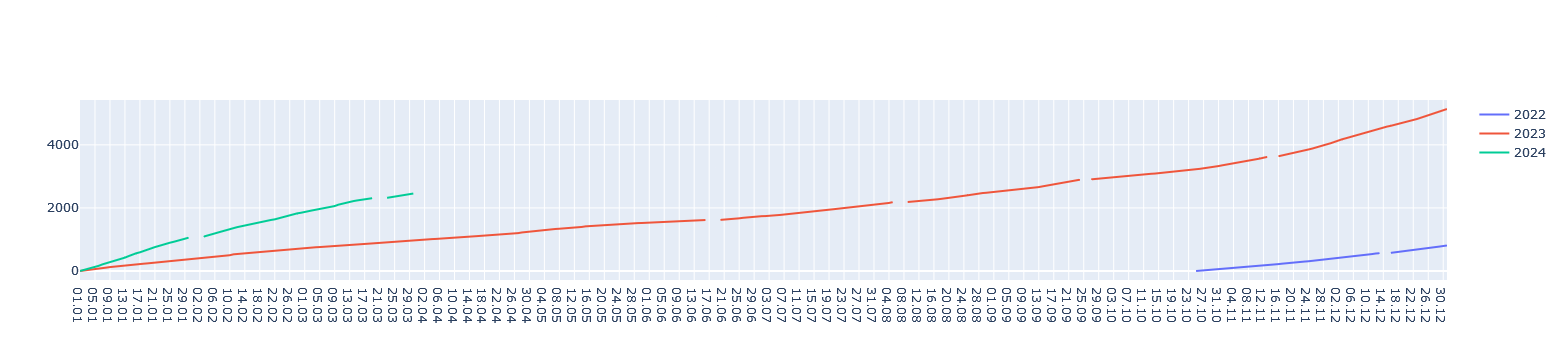

In [7]:
fig = go.Figure()
for i,csv in enumerate(csvs):
    skupna_poraba_letno = (csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0])).cumsum();
    fig.add_traces(go.Scatter(name=str(years[i]), x=csv['Datum'].dt.strftime('%d.%m'), y = skupna_poraba_letno))

fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified')
fig.show()

Presek

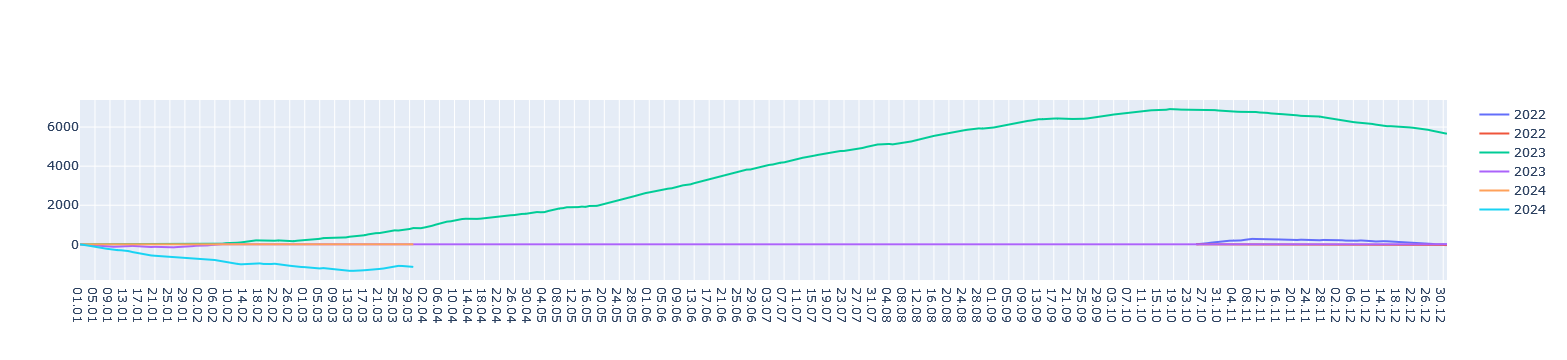

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [8]:
fig = go.Figure()
for i,csv in enumerate(csvs_filled):
    skupna_poraba_letno = (csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0])).cumsum();
    skupna_oddana_letno = (csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0])).cumsum();

    pm = skupna_oddana_letno - skupna_poraba_letno
    
    mask = pm >= 0
    plus = np.where(mask, pm, 0)
    minus = np.where(mask, 0, pm)
    
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = plus, name=str(years[i])))
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = minus, name=str(years[i])))

fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
fig.update_layout(hovermode='x unified')
fig.show()

plus

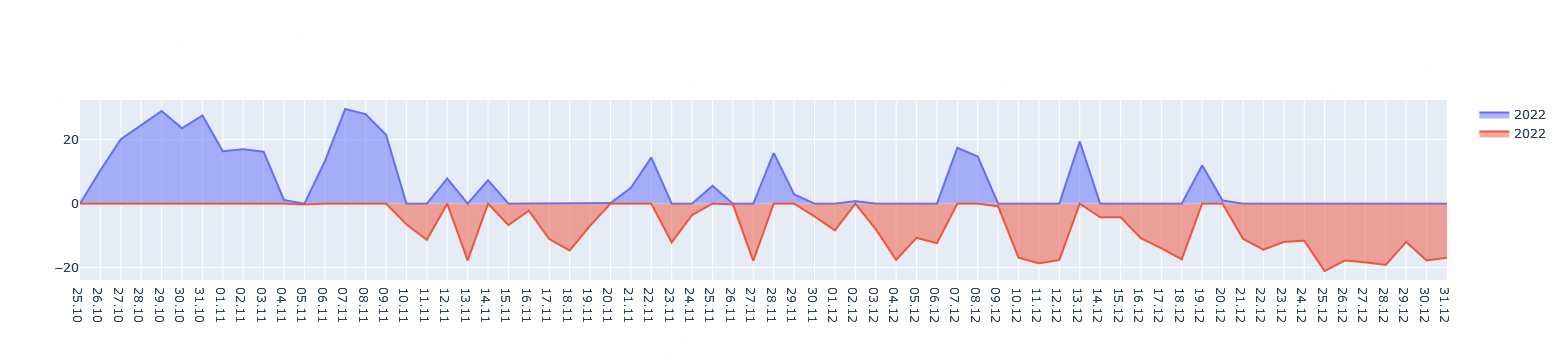

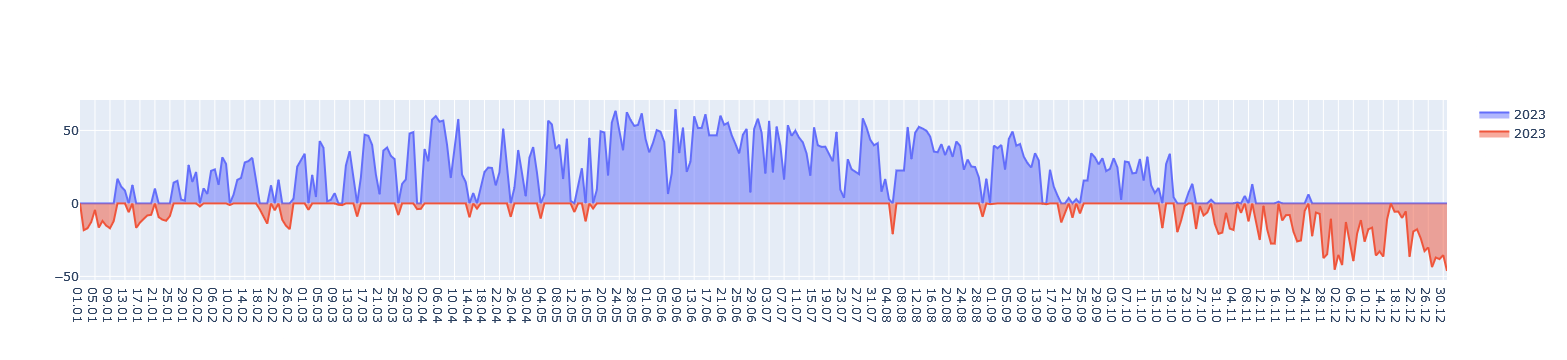

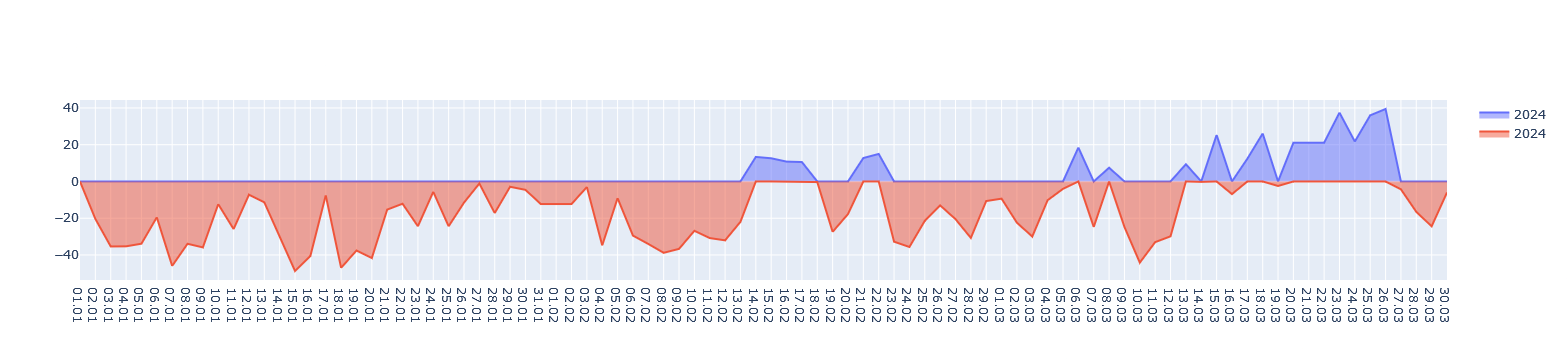

In [9]:
for i,csv in enumerate(csvs_filled):
    prejeta_per_day = csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0]);
    oddana_per_day = csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0]);
    
    pm = oddana_per_day - prejeta_per_day
    
    mask = pm >= 0
    plus = np.where(mask, pm, 0)
    minus = np.where(mask, 0, pm)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = plus, fill='tozeroy', name=str(years[i])))
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = minus, fill='tozeroy', name=str(years[i])))
    fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
    fig.update_layout(hovermode='x unified')
    fig.show()

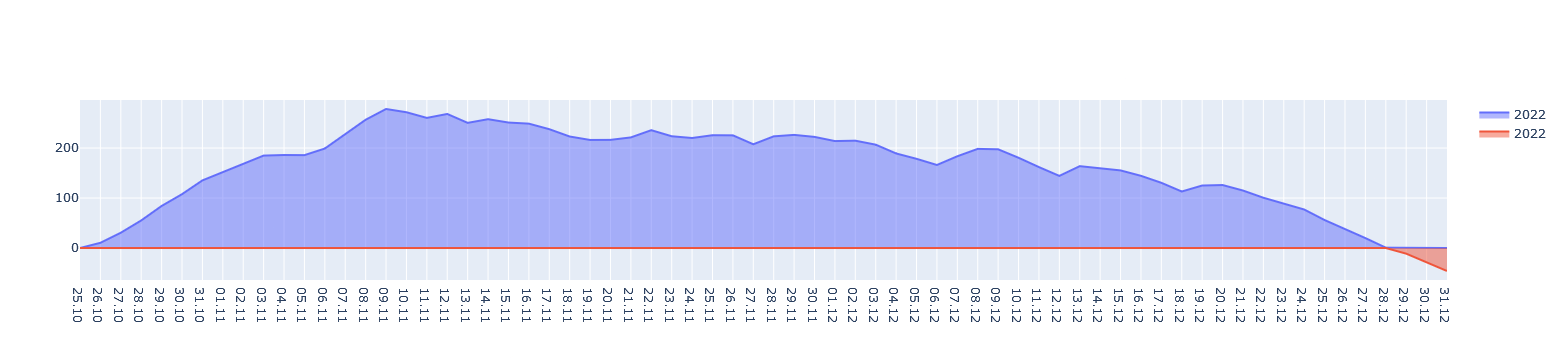

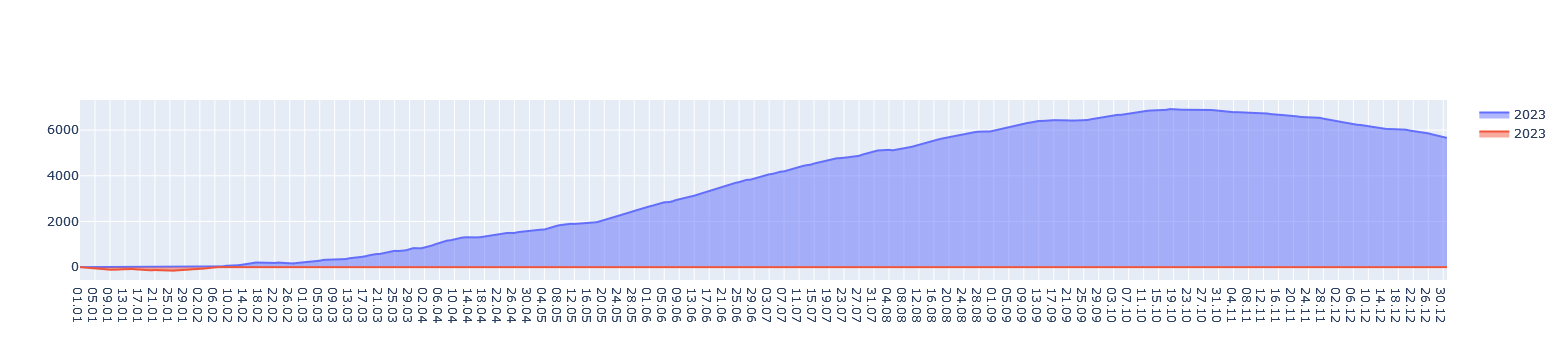

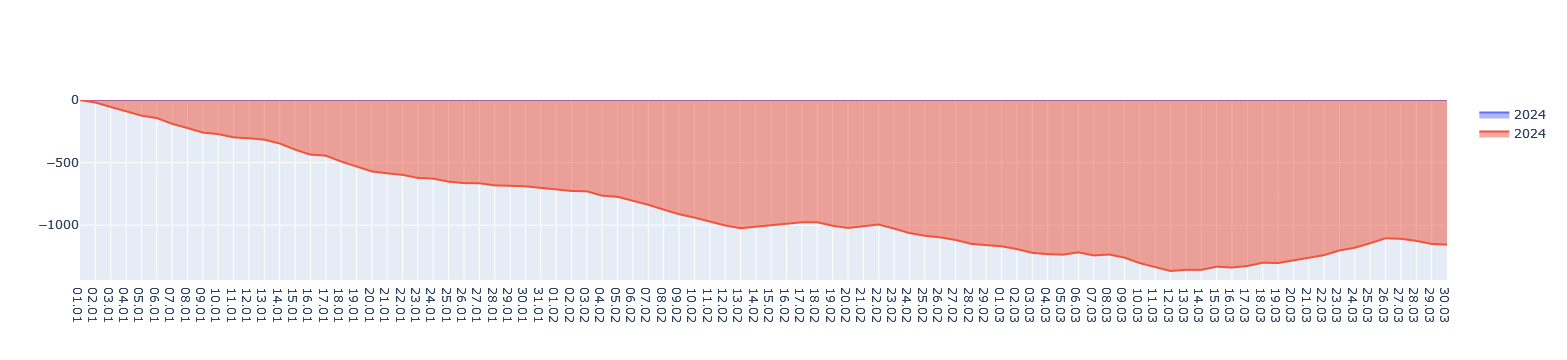

In [10]:
for i,csv in enumerate(csvs_filled):
    skupna_poraba_letno = (csv['PREJETA DELOVNA ENERGIJA ET'] - csv['PREJETA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['PREJETA DELOVNA ENERGIJA ET'][0])).cumsum();
    skupna_oddana_letno = (csv['ODDANA DELOVNA ENERGIJA ET'] - csv['ODDANA DELOVNA ENERGIJA ET'].shift(1, fill_value=csv['ODDANA DELOVNA ENERGIJA ET'][0])).cumsum();

    pm = skupna_oddana_letno - skupna_poraba_letno
    
    mask = pm >= 0
    plus = np.where(mask, pm, 0)
    minus = np.where(mask, 0, pm)
    
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = plus, name=str(years[i])))
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = minus, name=str(years[i])))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = plus, fill='tozeroy', name=str(years[i])))
    fig.add_trace(go.Scatter(x=csv['Datum'].dt.strftime('%d.%m'), y = minus, fill='tozeroy', name=str(years[i])))
    fig.update_xaxes(categoryorder='array', categoryarray=days_in_year)
    fig.update_layout(hovermode='x unified')
    fig.show()